In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#โหลดฟังก์ชั่นที่เราเขียนไว้
from getData import *
import os


#get current path
cwd = os.getcwd()

#set data path
path = cwd+'/Data/egdata' # you can use your path
#download dataframe allStocks.csv
allStocks = pd.read_csv(path+'/allStocks.CSV')

In [2]:
#load list of stocks
stocklist = ['LH', 'JAS', 'STA', 'CK', 'KBANK']
df = pd.DataFrame()
for i in range(0,len(stocklist)):
    stock = getStock(stocklist[i], allStocks)
    df[i] = stock['Close']
    
#set columns name
df.columns = stocklist

#drop na 
df.dropna(inplace=True)

#selection period
df = df['2010':'2017']

#normalization
dfNorm = (df/df.iloc[0]) *100
dfNorm.columns = stocklist


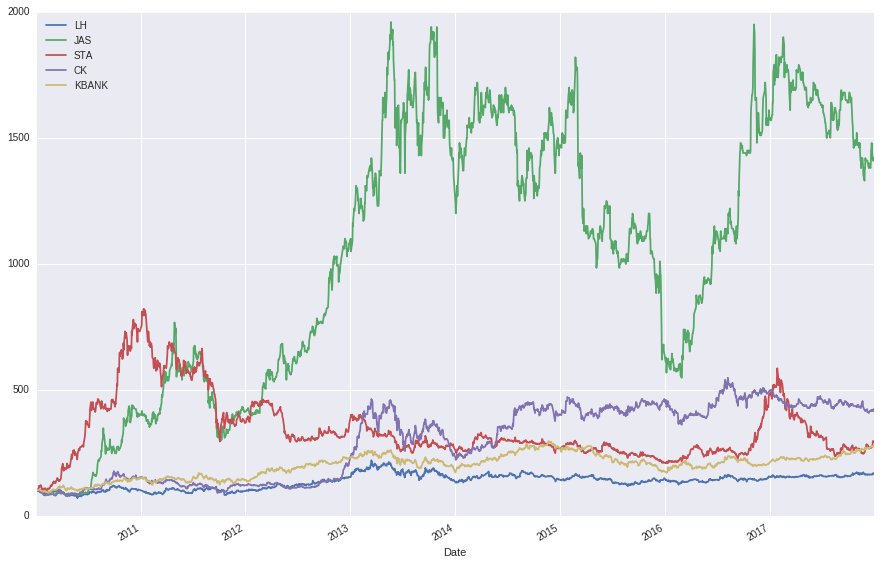

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 10.0)
dfNorm.plot()

# Monte Carlo

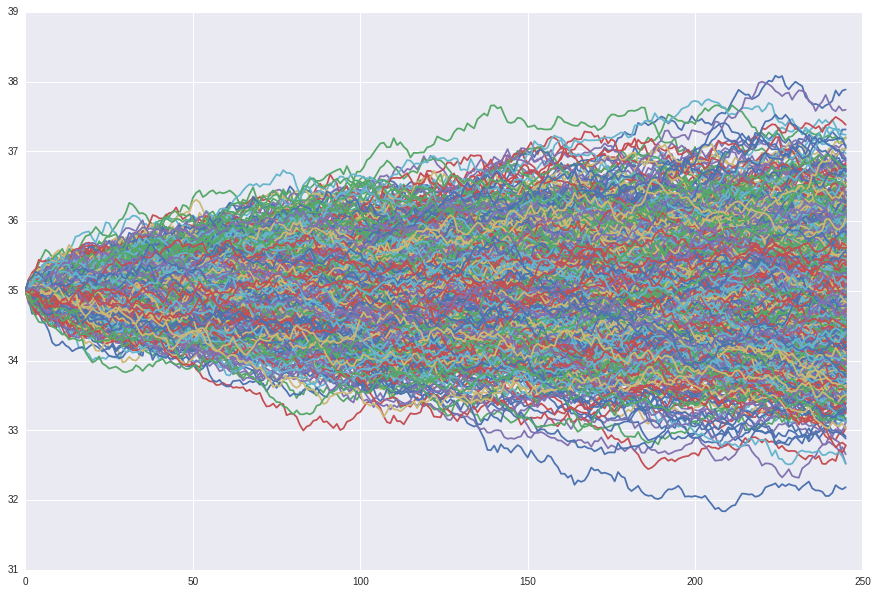

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm


result = []
df_pct_change = dfNorm['STA'].pct_change()
S = df['STA']['2010'][-1]#start price
T = 245 #trading days
mu = df_pct_change.mean() #mean of stock
vol =  df_pct_change.std() #volatility of stock
N = 1000

for i in range(N):
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    price_list = [S]
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    plt.plot(price_list)
    result.append(price_list[-1])
    
plt.show()

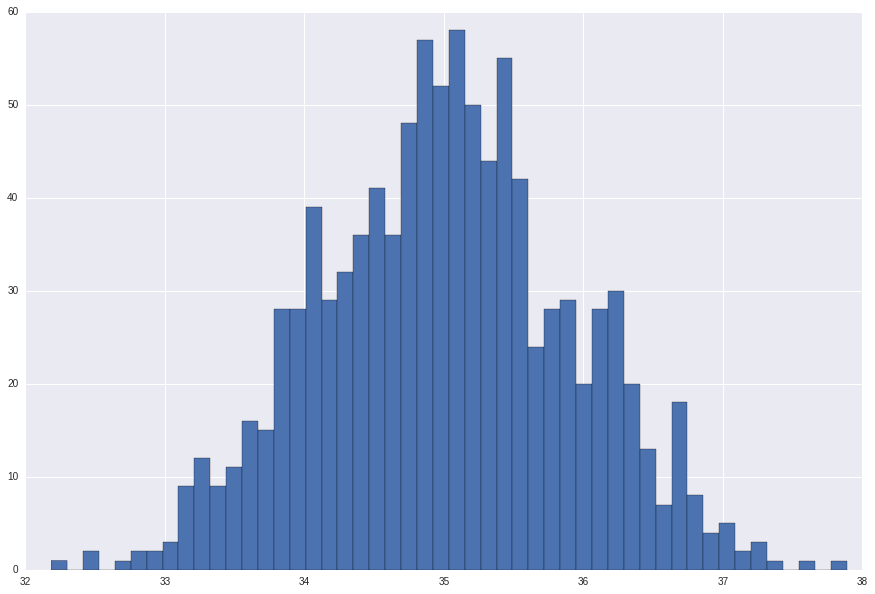

35.01
percentile 5% = 33.529018697557746
percentile 95% = 36.51721006432814


In [13]:
plt.hist(result,bins=50)
plt.show()
print(round(np.mean(result),2))
print("percentile 5% =",np.percentile(result,5))
print("percentile 95% =",np.percentile(result,95))

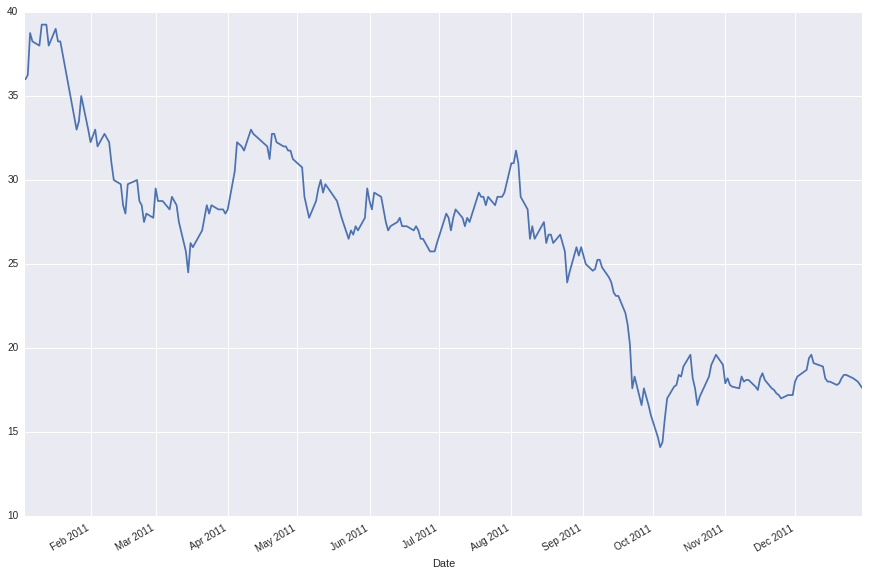

In [14]:
df['STA']['2011'].plot()